# Data Cleaning and EDA on Exercise Sample Dataset
Step-by-step data cleaning, analysis, and visualization.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# Load dataset from seaborn
df = sns.load_dataset("exercise")

# Save to CSV
df.to_csv("exercise.csv", index=False)


In [15]:
# Initial data check
print('Shape:', df.shape)
print(df.info())
print(df.describe(include='all'))

Shape: (90, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB
None
        Unnamed: 0         id    diet       pulse   time  kind
count    90.000000  90.000000      90   90.000000     90    90
unique         NaN        NaN       2         NaN      3     3
top            NaN        NaN  no fat         NaN  1 min  rest
freq           NaN        NaN      45         NaN     30    30
mean     44.500000  15.500000     NaN   99.700000    NaN   NaN
std      26.124701   8.703932     NaN   14.858471    NaN   NaN
min       0.000000   1.000000     NaN   80.000000 

In [16]:
# Check missing values
print(df.isnull().sum())

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64


In [17]:
# Check duplicates
print('Duplicated rows:', df.duplicated().sum())

Duplicated rows: 0


In [18]:
# Drop duplicates if any
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [19]:
# Drop unnamed index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [20]:
# Convert data types
df['id'] = df['id'].astype('category')
df['time'] = df['time'].astype('category')
df['diet'] = df['diet'].astype('category')
df['kind'] = df['kind'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     category
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     category
 4   kind    90 non-null     category
dtypes: category(4), int64(1)
memory usage: 2.8 KB


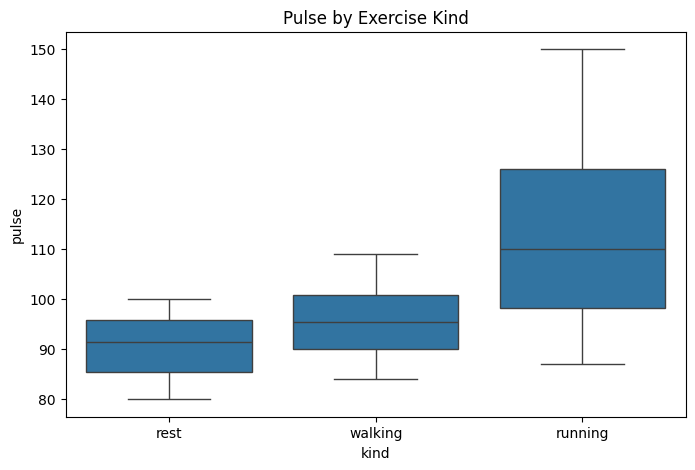

In [21]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='kind', y='pulse', data=df)
plt.title('Pulse by Exercise Kind')
plt.show()

In [24]:
#Check numeric columns

numeric_cols = df.select_dtypes(include=['float64','int64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['pulse'], dtype='object')


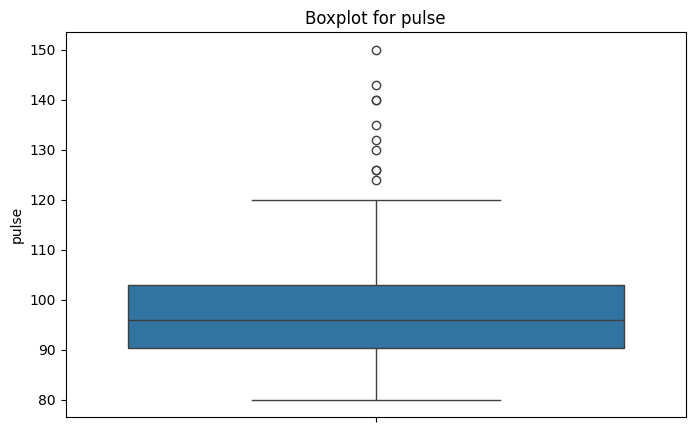

Column: pulse, Outliers count: 10
    pulse
70    132
76    126
77    143
79    126
80    140
82    124
83    140
85    135
86    130
89    150


In [25]:
#Boxplot and Outlier Detection for Each Numeric Column

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}, Outliers count: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print(outliers[[col]])


In [26]:
#Remove Outliers
df_clean = df.copy()
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_clean.shape)


Shape before removing outliers: (90, 5)
Shape after removing outliers: (80, 5)


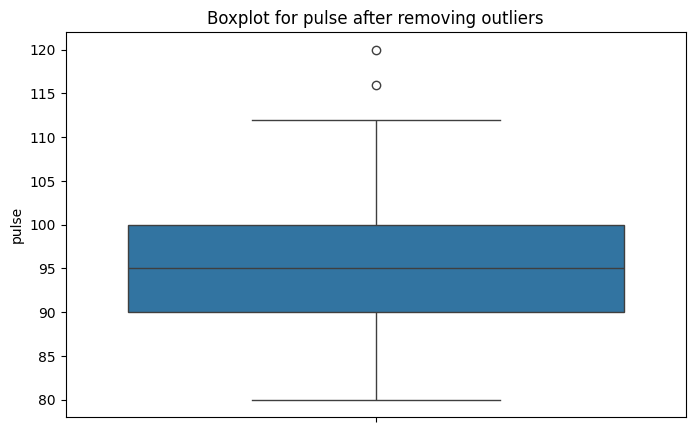

In [27]:
#Verify Cleaned Data
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot for {col} after removing outliers')
    plt.show()


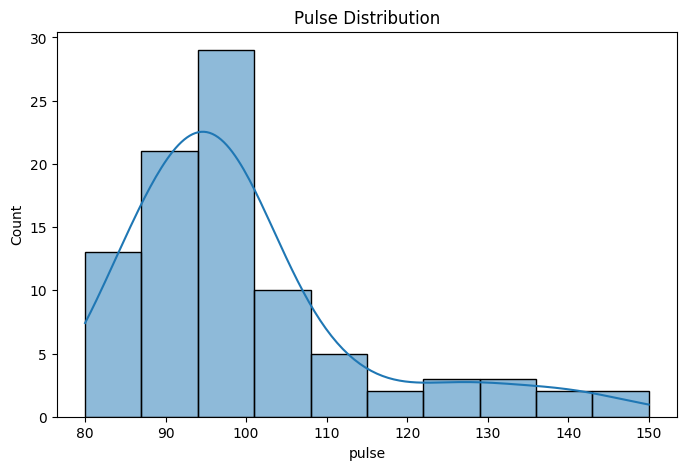

In [28]:
# Histogram of pulse
plt.figure(figsize=(8,5))
sns.histplot(df['pulse'], bins=10, kde=True)
plt.title('Pulse Distribution')
plt.show()

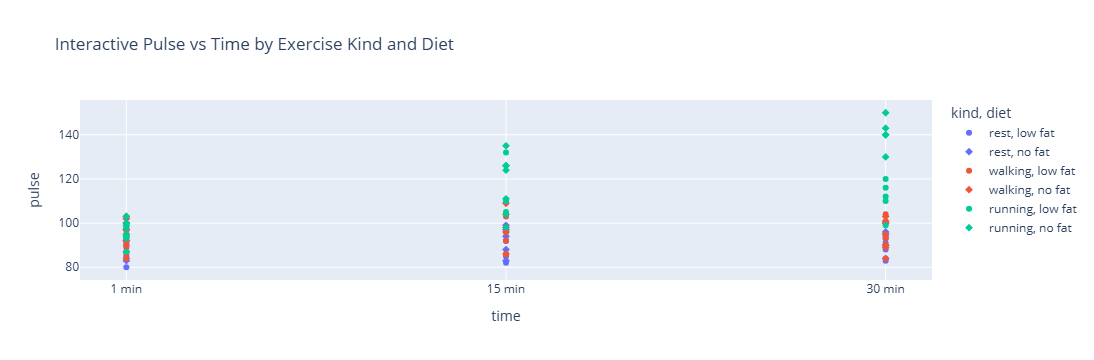

In [22]:
# Interactive scatter plot
fig = px.scatter(df, x='time', y='pulse', color='kind', symbol='diet', hover_data=['id'], title='Interactive Pulse vs Time by Exercise Kind and Diet')
fig.show()

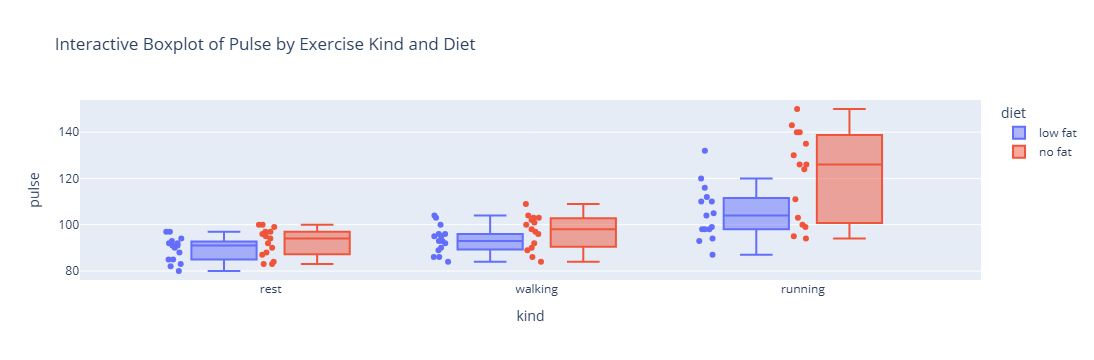

In [23]:
# Interactive boxplot
fig = px.box(df, x='kind', y='pulse', color='diet', points='all', title='Interactive Boxplot of Pulse by Exercise Kind and Diet')
fig.show()